In [1]:
# Superstore Sales Dashboard Analysis

# ===============================
# 1. Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set plotting style
sns.set(style="whitegrid")
%matplotlib inline

# ===============================
#  2. Load the Dataset
# ===============================
# Use your own path to the file
df = pd.read_csv(r"C:\Users\USER\Desktop\calc\Superstore\Sample - Superstore.csv", encoding='cp1252')

# Check structure
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
# ===============================
#  3. Data Cleaning
# ===============================
# Drop duplicates
df.drop_duplicates(inplace=True)

# Convert date columns
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Check for nulls
df.isnull().sum()

# Basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [3]:
4. #Expolatory Data with Currency in USD

total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
profit_margin = total_profit / total_sales

print(f" Total Sales: ${total_sales:,.2f}")
print(f" Total Profit: ${total_profit:,.2f}")
print(f" Profit Margin: {profit_margin:.2%}")



 Total Sales: $2,297,200.86
 Total Profit: $286,397.02
 Profit Margin: 12.47%


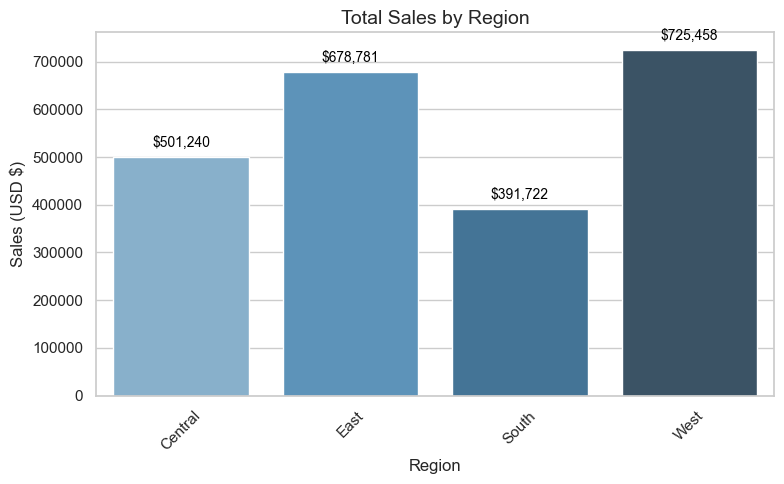

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group sales
region_sales_df = df.groupby('Region', as_index=False)['Sales'].sum()

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=region_sales_df, x='Region', y='Sales', hue='Region', palette='Blues_d', legend=False)

ax.set_title("Total Sales by Region", fontsize=14)  # No emoji
ax.set_ylabel("Sales (USD $)", fontsize=12)
ax.set_xlabel("Region", fontsize=12)
plt.xticks(rotation=45)

# Add annotations
for bar in ax.patches:
    value = bar.get_height()
    x_pos = bar.get_x() + bar.get_width() / 2
    y_pos = value
    ax.annotate(f"${value:,.0f}",
                (x_pos, y_pos),
                ha='center', va='bottom',
                fontsize=10, color='black',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()




GROUP AND SORT PROFIT BY CATEGORY AND DISCOUNT

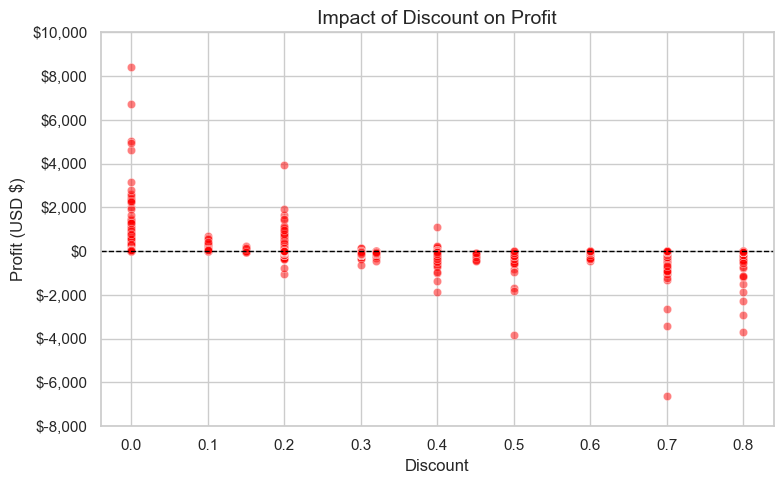

In [5]:
df.groupby('Category')[['Discount', 'Profit']].mean()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.5, color='red')

# Format and labels
plt.title("Impact of Discount on Profit", fontsize=14)
plt.xlabel("Discount", fontsize=12)
plt.ylabel("Profit (USD $)", fontsize=12)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Currency formatting for y-axis
locs, labels = plt.yticks()
plt.yticks(locs, [f"${y:,.0f}" for y in locs])

plt.tight_layout()
plt.show()



Group and sort profit by Category and Sub-Category to find the losses incured.

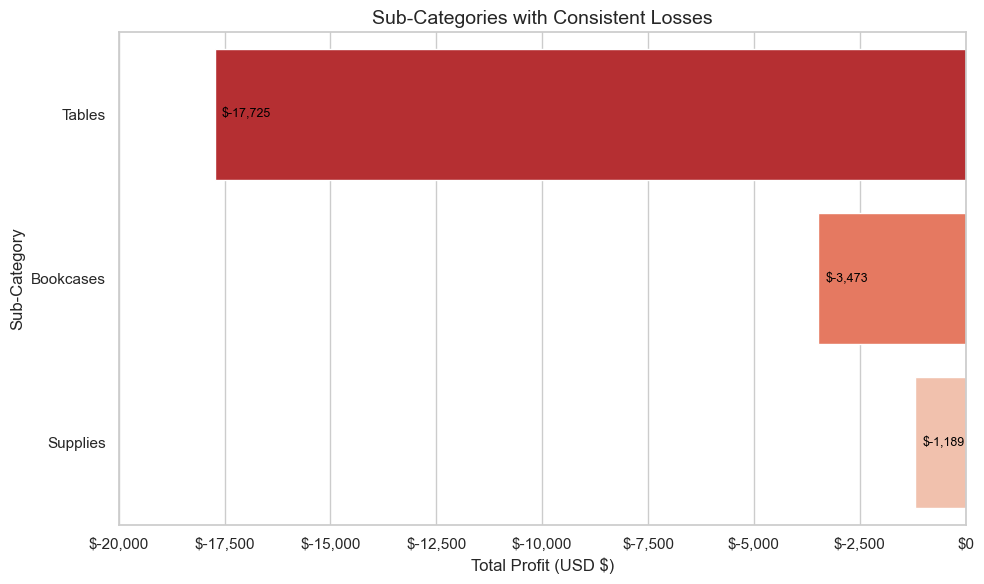

In [6]:
losses = df.groupby(['Category', 'Sub-Category'])['Profit'].sum().sort_values()
losses.head(5)  # Most unprofitable sub-categories

# Prepare data
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
loss_making = subcat_profit[subcat_profit < 0].reset_index()

plt.figure(figsize=(10, 6))

# Plot: assign hue same as y to avoid deprecation warning
ax = sns.barplot(data=loss_making, x='Profit', y='Sub-Category', 
                 hue='Sub-Category', palette='Reds_r', legend=False)

# Titles and axis
ax.set_title("Sub-Categories with Consistent Losses", fontsize=14)
ax.set_xlabel("Total Profit (USD $)", fontsize=12)
ax.set_ylabel("Sub-Category", fontsize=12)

# Currency formatting for x-axis
locs, labels = plt.xticks()
plt.xticks(locs, [f"${x:,.0f}" for x in locs])

# Annotate bars with dollar values
for bar in ax.patches:
    value = bar.get_width()
    x_pos = value
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.annotate(f"${value:,.0f}",
                (x_pos, y_pos),
                ha='left', va='center',
                fontsize=9, color='black',
                xytext=(5, 0),
                textcoords='offset points')

plt.tight_layout()
plt.show()



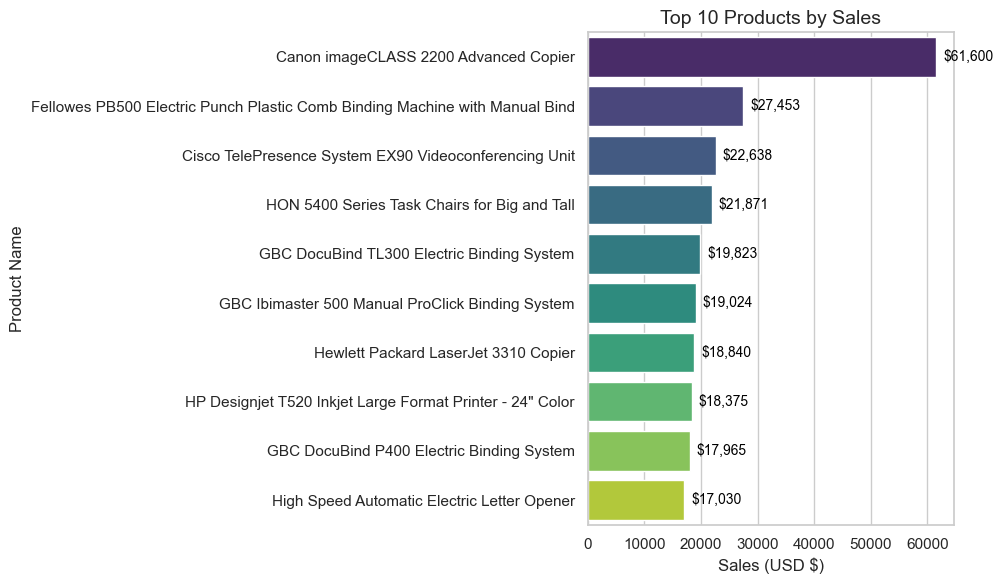

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group by Product and get total sales
top_products_df = (
    df.groupby('Product Name', as_index=False)['Sales']
    .sum()
    .sort_values(by='Sales', ascending=False)
    .head(10)
)

#  Step 2: Plot the Top 10 Products
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_products_df,
                 y='Product Name', x='Sales',
                 hue='Product Name',  #  required to avoid palette warning
                 palette='viridis', legend=False)

#  Titles and Labels
ax.set_title("Top 10 Products by Sales", fontsize=14)
ax.set_xlabel("Sales (USD $)", fontsize=12)
ax.set_ylabel("Product Name", fontsize=12)

#  Annotate each bar with currency
for bar in ax.patches:
    value = bar.get_width()
    x_pos = value
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.annotate(f"${value:,.0f}",
                (x_pos, y_pos),
                ha='left', va='center',
                fontsize=10, color='black',
                xytext=(5, 0),
                textcoords='offset points')

plt.tight_layout()
plt.show()

